Column names in the dataset:
Index(['longitude', 'latitude', 'housing_median_age', 'total_rooms',
       'total_bedrooms', 'population', 'households', 'median_income',
       'median_house_value', 'ocean_proximity'],
      dtype='object')

Basic Information:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(9), object(1)
memory usage: 

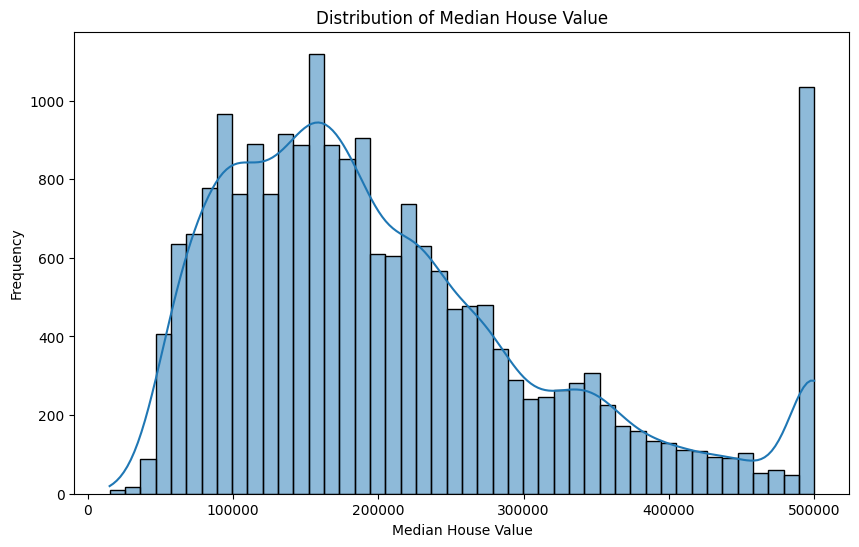

Mean Squared Error: 7091157771.7655
R-squared: 0.4589


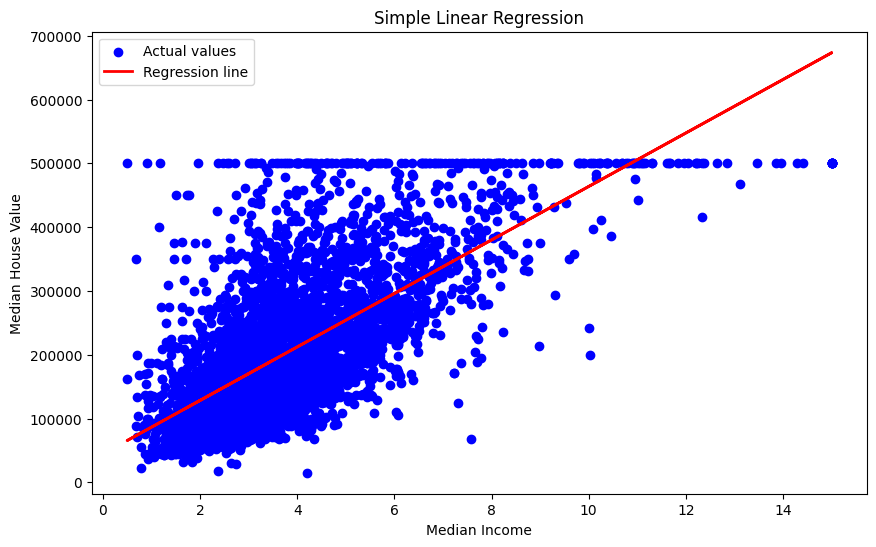

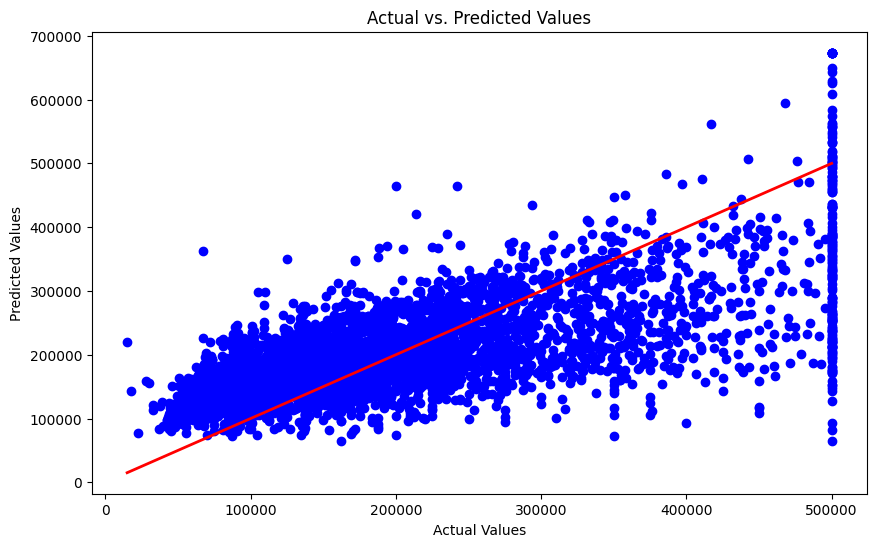

In [4]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

# Load the dataset from the provided path
df = pd.read_csv('/content/housing.csv')

# Display the column names to understand the dataset structure
print("Column names in the dataset:")
print(df.columns)

# Display basic information about the dataset
print("\nBasic Information:")
print(df.info())

# Display first few rows of the dataset
print("\nFirst few rows of the dataset:")
print(df.head())

# Summary statistics of the dataset
print("\nSummary statistics of the dataset:")
print(df.describe())

# Check for missing values
print("\nMissing values in the dataset:")
print(df.isnull().sum())

# Assuming 'MedInc' is the feature and 'MedHouseVal' is the target variable
# You may need to change these column names based on your actual dataset
# Print the column names to check the actual names
print("\nColumn names in the dataset:")
print(df.columns)

# Assuming 'median_income' is the feature and 'median_house_value' is the target variable (change as necessary)
if 'median_income' not in df.columns or 'median_house_value' not in df.columns:
    raise ValueError("Dataset must contain 'median_income' and 'median_house_value' columns.")

# Visualize the distribution of the target variable
plt.figure(figsize=(10, 6))
sns.histplot(df['median_house_value'], kde=True)
plt.title('Distribution of Median House Value')
plt.xlabel('Median House Value')
plt.ylabel('Frequency')
plt.show()

# Select one feature for simple linear regression
X = df[['median_income']]  # Median Income
y = df['median_house_value']  # Median House Value

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train the linear regression model
lin_reg = LinearRegression()
lin_reg.fit(X_train, y_train)

# Make predictions on the test set
y_pred = lin_reg.predict(X_test)

# Evaluate the model's performance
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print(f"Mean Squared Error: {mse:.4f}")
print(f"R-squared: {r2:.4f}")

# Visualize the regression line
plt.figure(figsize=(10, 6))
plt.scatter(X_test, y_test, color='blue', label='Actual values')
plt.plot(X_test, y_pred, color='red', linewidth=2, label='Regression line')
plt.title('Simple Linear Regression')
plt.xlabel('Median Income')
plt.ylabel('Median House Value')
plt.legend()
plt.show()

# Visualize actual vs. predicted values
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, color='blue')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color='red', linewidth=2)
plt.title('Actual vs. Predicted Values')
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.show()

